KMeans clustering on digits data.

Kmeans clustering from scratch 

In [ ]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Load digits data from datasets.

In [ ]:
digits = datasets.load_digits(n_class=5) # digits from 0 to 4
x = digits.data
y = digits.target
print (x.shape)

(901, 64)


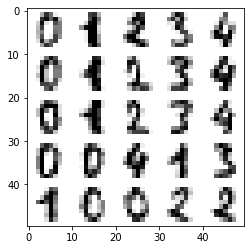

In [ ]:
nImagesperRow=5
img=np.zeros((10*nImagesperRow, 10*nImagesperRow))
for i in range(nImagesperRow):
    im = 10 * i + 1
    for j in range(nImagesperRow):
        jm = 10 * j + 1
        img[im:im+8,jm:jm+8]=x[i*nImagesperRow+j].reshape((8,8))
plt.imshow(img, cmap=plt.cm.binary) 

Dimensionality reduction using PCA. Number of components in PCA is 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(digits.data)
print(X_PCA.shape)
data1 = pd.DataFrame(X_PCA, columns = ['PCA1','PCA2'])

(901, 2)


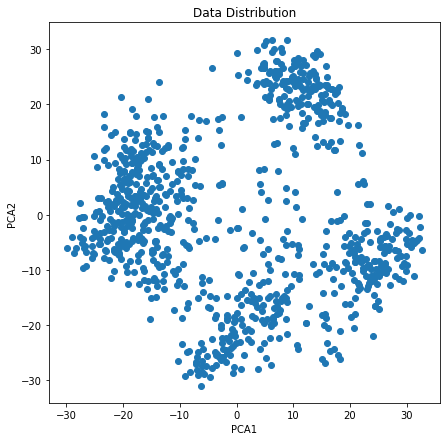

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data1["PCA1"],data1["PCA2"])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Data Distribution')
plt.show()

# **K- Means Clustering Algorithm from scratch**

In [ ]:
from scipy.spatial.distance import cdist 

def kmeans(data, k, no_iterations):
  # randomly choosing index and centorids
  index = np.random.choice(len(data), k, replace=False)
  centroids = data[index,:]
  # find ditance between centroid and all other points
  distances = cdist(data, centroids, 'euclidean')
  # choose the nearest point 
  points = np.array([np.argmin(i) for i in distances])
  for itr in range(no_iterations):
    centroids_points= []
    for indx_points in range(k):
      temp_centroid = data[points==indx_points].mean(axis=0)
      centroids_points.append(temp_centroid)
    centroids_points = np.vstack(centroids_points)
    distances = cdist(data, centroids_points, 'euclidean')
    points = np.array([np.argmin(i) for i in distances])
  return points

In [ ]:
target_labels = kmeans(X_PCA,5,1000)

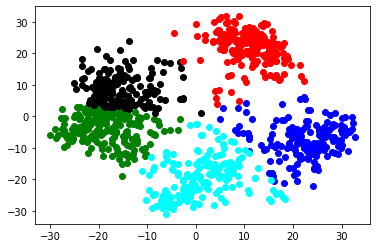

In [ ]:
frame = pd.DataFrame(X_PCA)
frame['cluster'] = target_labels
frame.columns = ['PCA1', 'PCA2', 'cluster']

#plotting results
color=['blue','green','cyan', 'black', 'red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PCA1"],data["PCA2"],c=color[k])
plt.show()